C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: Future

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


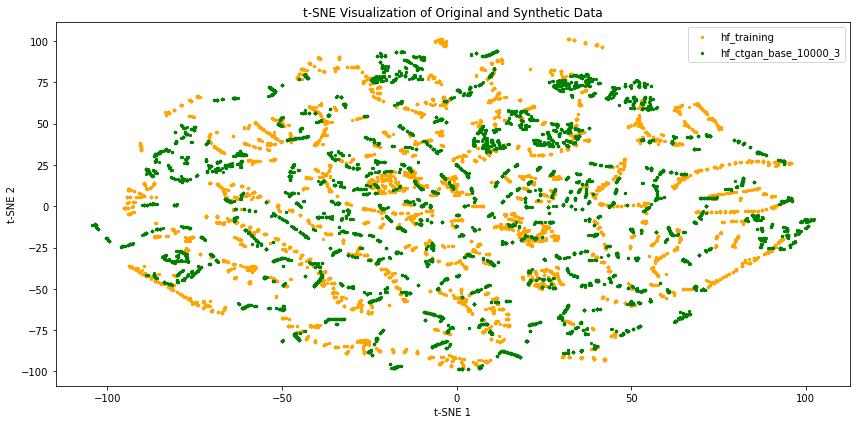

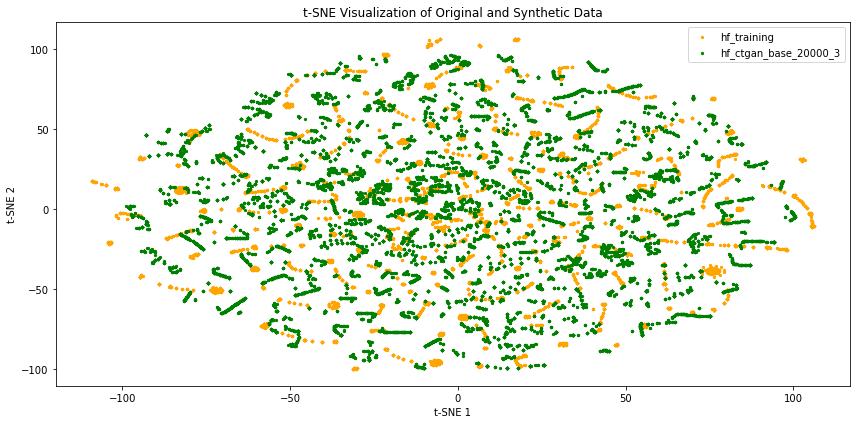

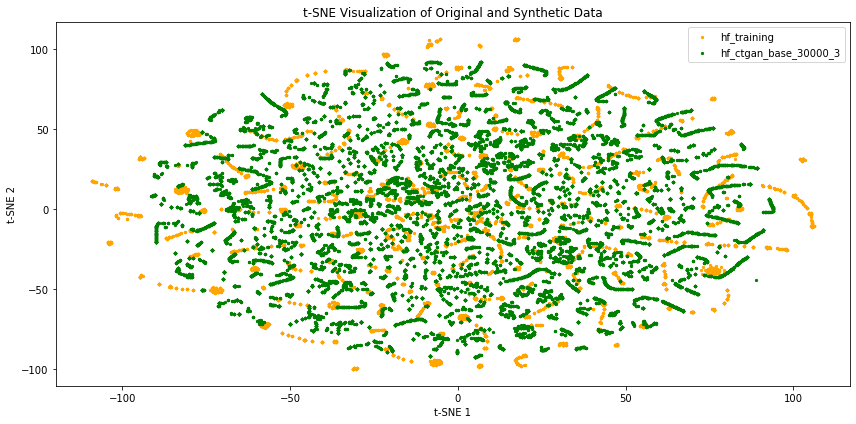

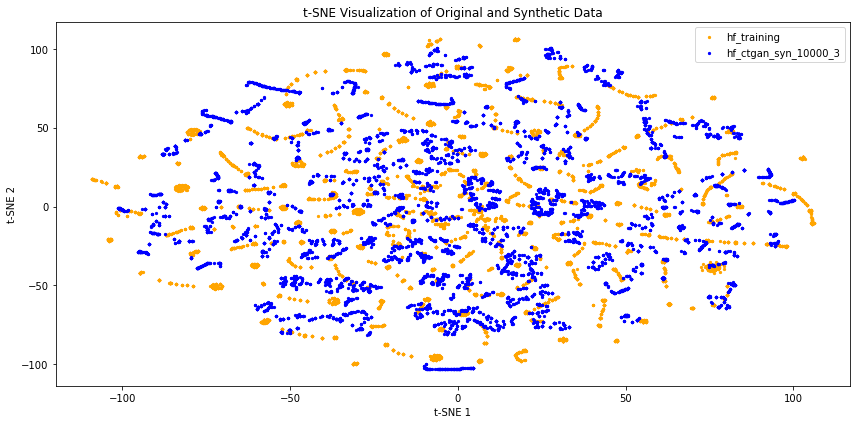

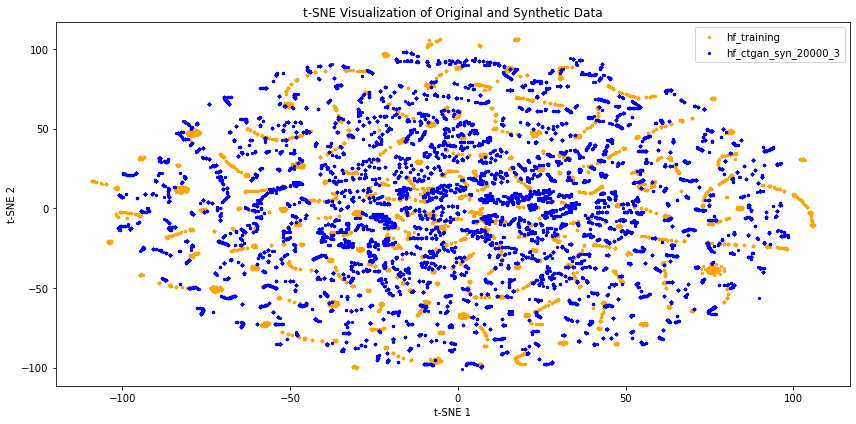

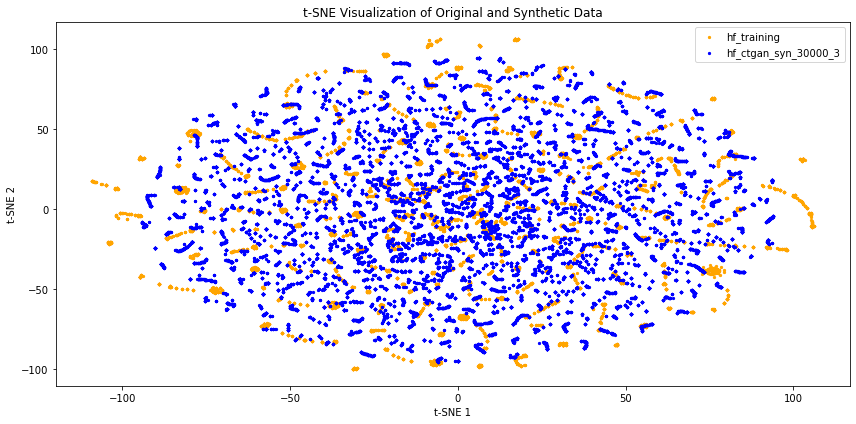

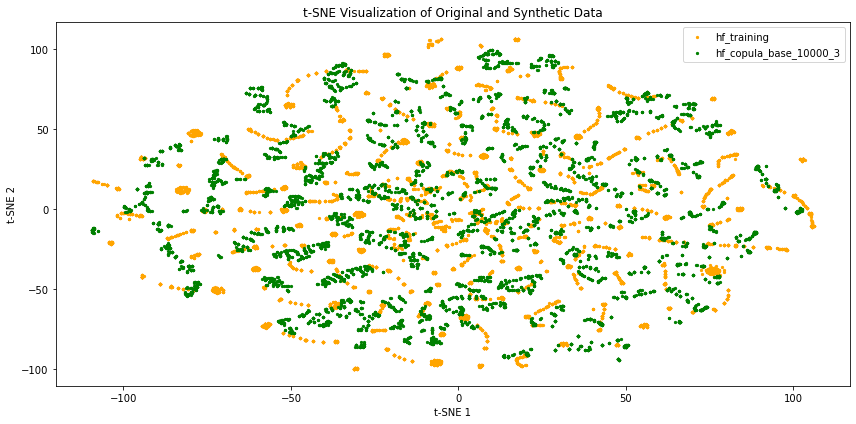

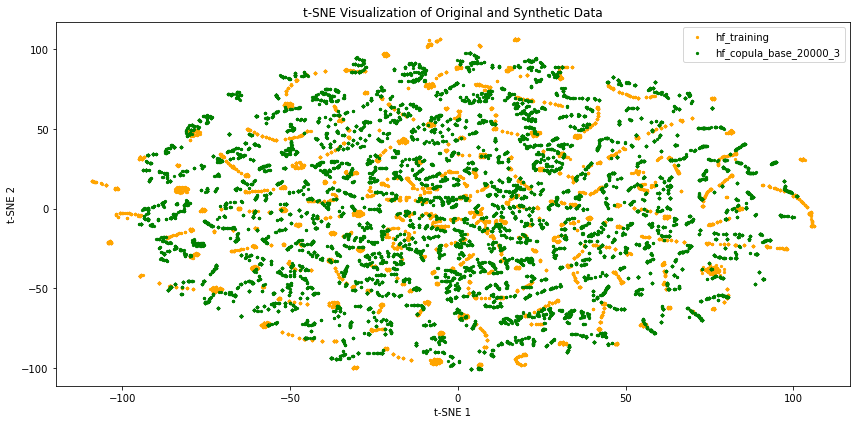

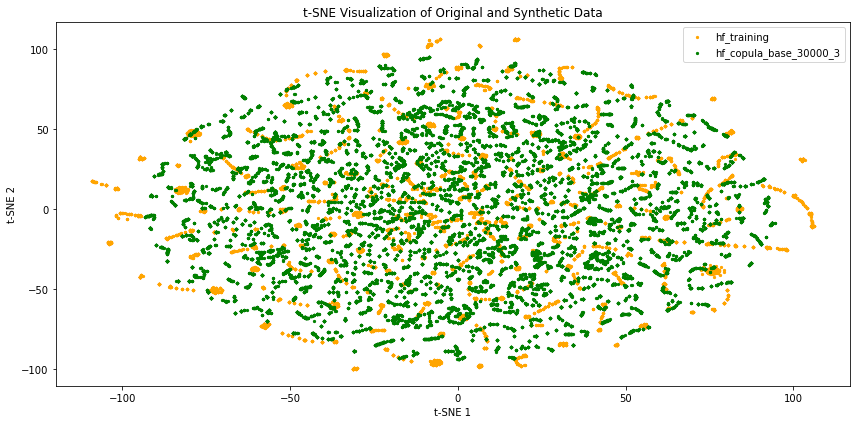

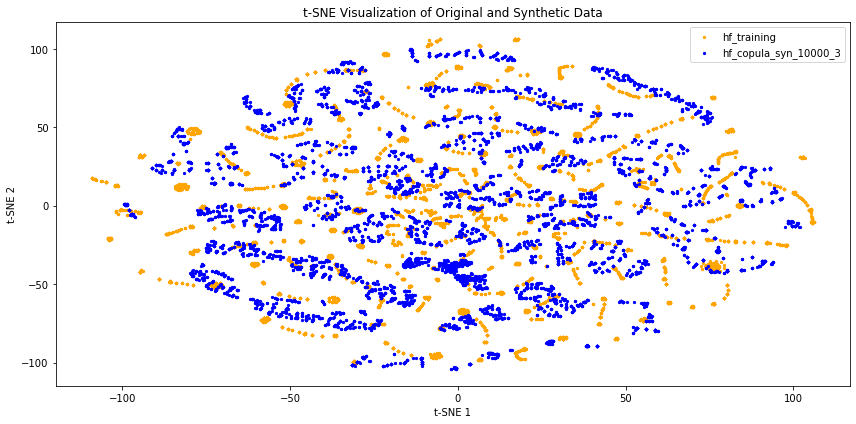

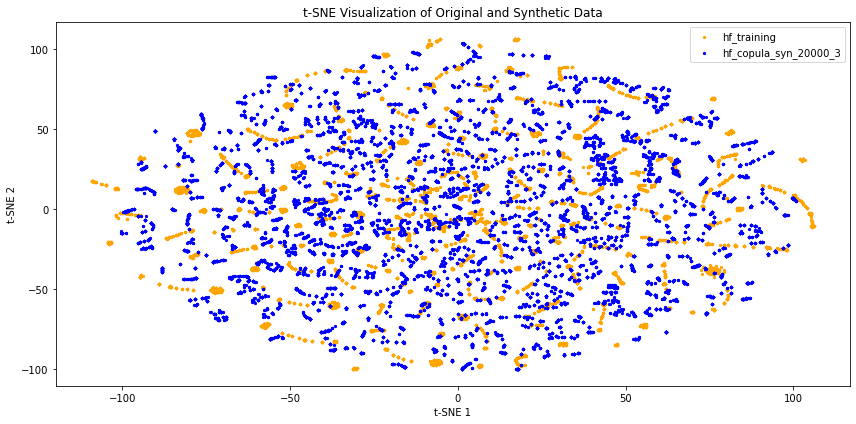

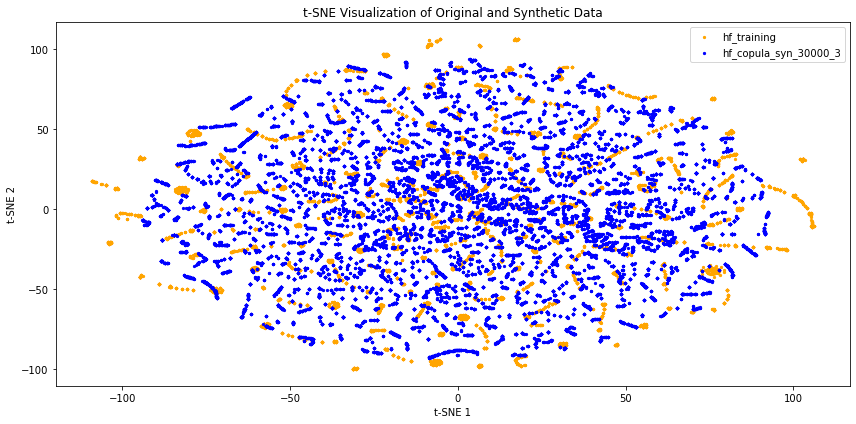

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data_names = ['hf_ctgan_base_10000_3', 'hf_ctgan_base_20000_3', 'hf_ctgan_base_30000_3', 'hf_ctgan_syn_10000_3', 'hf_ctgan_syn_20000_3', 'hf_ctgan_syn_30000_3', 
'hf_copula_base_10000_3', 'hf_copula_base_20000_3', 'hf_copula_base_30000_3', 'hf_copula_syn_10000_3', 'hf_copula_syn_20000_3', 'hf_copula_syn_30000_3']

origin_data_name='hf_training'
# 원본 데이터 로드
original_data = pd.read_csv(f'../results/{origin_data_name}.csv')

for data_name in data_names:

    # 합성 데이터 로드
    synthetic_data = pd.read_csv(f'../results/{data_name}.csv')

    # 필요한 열 선택
    columns = ['tran_dt', 'tran_tmrg', 'tran_amt', 'md_type', 'fnd_type', 'ff_sp_ai']

    # 원본 데이터와 합성 데이터의 공통된 칼럼 선택
    original_data = original_data[columns]
    synthetic_data = synthetic_data[columns]

    # 날짜 열을 숫자로 변환 (예: 연도, 월, 일로 분리하여 각각 숫자로 변환)
    original_data['tran_dt'] = pd.to_datetime(original_data['tran_dt'], format='%Y-%m-%d').map(lambda x: x.toordinal())
    synthetic_data['tran_dt'] = pd.to_datetime(synthetic_data['tran_dt'], format='%Y-%m-%d').map(lambda x: x.toordinal())

    # 범주형 데이터를 숫자로 인코딩
    for column in ['md_type', 'fnd_type', 'ff_sp_ai']:
        original_data[column] = original_data[column].astype('category').cat.codes
        synthetic_data[column] = synthetic_data[column].astype('category').cat.codes

    # 데이터 정규화
    scaler = StandardScaler()
    original_data_scaled = scaler.fit_transform(original_data)
    synthetic_data_scaled = scaler.transform(synthetic_data)

    # t-SNE 적용
    tsne = TSNE(n_components=2, random_state=42)
    original_data_tsne = tsne.fit_transform(original_data_scaled)
    synthetic_data_tsne = tsne.fit_transform(synthetic_data_scaled)

    # 시각화
    plt.figure(figsize=(12, 6))

    # 하나의 plot에 원본 데이터와 합성 데이터 시각화
    
    syn_color = 'green'
    if '_syn_' in data_name:
        syn_color = 'blue'
    
    plt.scatter(original_data_tsne[:, 0], original_data_tsne[:, 1], s=5, color='orange', label=origin_data_name)
    plt.scatter(synthetic_data_tsne[:, 0], synthetic_data_tsne[:, 1], s=5, color=syn_color, label=data_name)
    plt.title('t-SNE Visualization of Original and Synthetic Data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend()

    plt.tight_layout()
    # plt.show()
    plt.savefig(f'../evaluation/_vis/tsne_{data_name}.png')
